In [1]:
%matplotlib inline
from matplotlib import pylab as plot
import seaborn as sns
import numpy as np
from scipy import stats
import random


/Users/bryan/.virtualenvs/scipy/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def confidence_interval(samples, ci):
    avg = np.mean(samples)
    s = np.std(samples)
    n = len(samples)
    dof = n - 1
    return stats.t.interval(ci, dof, loc=avg, scale=s/np.sqrt(n))

In [5]:
def bootstrap_confidence_interval(samples, ci, num_draws=int(1e4)):
    draws = []
    for k in xrange(num_draws):
        s = 0
        for x in xrange(len(samples)):
            s += random.choice(samples)
        draws.append(s/len(samples))
        
    return np.percentile(draws, [100*(1-ci)/2, 100*(1+ci)/2])

T dist est:  (8.8855696715394643, 10.142387123920674)
Bootstrap est:  [  8.87939702  10.13308348]


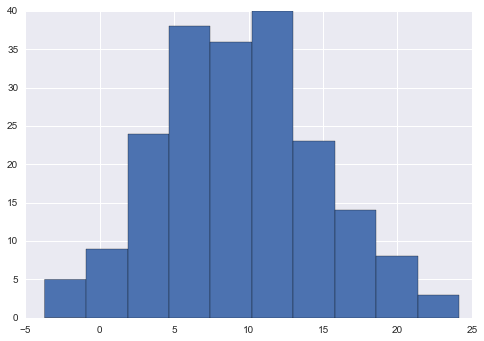

In [7]:
mu = 10
sigma = 5
samples = np.random.normal(loc=mu, scale=sigma, size=(200,1))
# samples = np.random.uniform(size=(200,1))

ci = 0.90
print 'T dist est: ', confidence_interval(samples, ci)
print 'Bootstrap est: ', bootstrap_confidence_interval(samples, ci)
x = plot.hist(samples)

# draw CIs